In [1]:
import geopandas as gpd
from dbfread import DBF
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os
import pyproj

In [ ]:
main_road=gpd.read_file('Datasets_Hackathon\Streamwater_Line_Road_Network\Main_Road.shp')
print(main_road.loc[0, 'geometry'])

LINESTRING (-12.646003989789042 17.642220990834275, -12.626732118552923 17.64990798497714, -12.610077827773331 17.66066004792218, -12.59285514708738 17.66679803684277, -12.564443149436084 17.684996076416105, -12.552059813622396 17.696793016322694, -12.542104070199118 17.714280941809918, -12.53779096605342 17.721853014721642, -12.525342803863815 17.728361062828068, -12.514043869049356 17.74340396274428, -12.502604876900703 17.748335003715173, -12.49063995499485 17.751232006591863)


In [4]:
re_road = gpd.read_file('road_reprojected.shp')
print(re_road.loc[0, 'geometry'])

LINESTRING (-1340037.3682505565 1961727.6800594036, -1337938.117425602 1962582.435772664, -1336093.6112044444 1963778.0119706932, -1334223.2751046596 1964460.5259677512, -1331078.2663412346 1966484.0579239815, -1329679.046970249 1967795.81927006, -1328494.9473701834 1969740.3900535756, -1327982.0189508782 1970582.3670945656, -1326615.3665590843 1971306.0298420258, -1325307.353511381 1972978.7258800885, -1324059.432262851 1973527.0332371462, -1322770.9058268857 1973849.1656225964)


In [7]:
streamwater = gpd.read_file("Datasets_Hackathon\Streamwater_Line_Road_Network\Streamwater.shp")
print(streamwater.loc[0, 'geometry'])
re_streams = gpd.read_file('streams_reprojected.shp')
print(re_streams.loc[0, 'geometry'])

LINESTRING (-11.4104309 16.4870553, -11.4077187 16.4893927, -11.4051094 16.4891128, -11.4028092 16.4908905, -11.3997536 16.4915983, -11.3986893 16.4911374, -11.3982945 16.4904461, -11.3972988 16.4904297, -11.3967667 16.4908247, -11.395977 16.4911045, -11.3950501 16.4910058, -11.3941918 16.4901169, -11.391016 16.4904955, -11.3864842 16.4910222, -11.380476 16.4906107)
LINESTRING (-1216616.0007193193 1833278.9710254408, -1216312.1303667384 1833538.878339931, -1216035.6804177144 1833507.7548448835, -1215779.2619214922 1833705.4262887822, -1215449.0255509154 1833784.130146571, -1215338.4435154302 1833732.880347115, -1215300.690442327 1833656.0112076835, -1215194.630607782 1833654.187608831, -1215135.4174695066 1833698.1096543618, -1215049.462214474 1833729.2220299048, -1214951.254887693 1833718.247078275, -1214865.321665903 1833619.4057965726, -1214524.3375017561 1833661.5042432516, -1214037.8474762281 1833720.0706771272, -1213399.8273215727 1833674.3139132385)


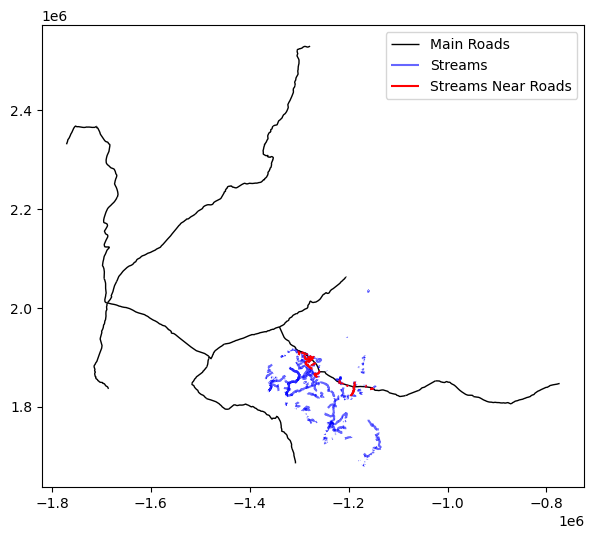

In [8]:
#Identify Intersections (Streams Crossing Roads)
buffered_roads = re_road.buffer(500)  # 500 meters buffer around roads
streams_near_roads_1 = re_streams[re_streams.geometry.intersects(buffered_roads.union_all())]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
re_road.plot(ax=ax, color="black", linewidth=1, label="Main Roads")
re_streams.plot(ax=ax, color="blue", alpha=0.6, label="Streams")
streams_near_roads_1.plot(ax=ax, color="red", label="Streams Near Roads")

plt.legend()
plt.show()
